In [58]:
# Task a
import pandas as pd 

#train_data = pd.read_csv('trndata.csv')
#test_data = pd.read_csv('tstdata.csv')
train_data = pd.read_csv(r"C:\Users\admin\anaconda3\Lib\site-packages\PIL\trndata.csv")
test_data = pd.read_csv(r"C:\Users\admin\anaconda3\Lib\site-packages\PIL\tstdata.csv")

#Task b

In [59]:
print('Training data points:',train_data.shape[0])
print('Training features:',train_data.shape[1])

#print('\n \n \n')

print('Testing data points:',test_data.shape[0])
print('Testing features:',test_data.shape[1])

#print('\n \n \n')

print('datapoints in each training class:','\n',train_data['L'].value_counts())
print('\n')
print('datapoints in each testing class:','\n',test_data['L'].value_counts())

Training data points: 1000
Training features: 13
Testing data points: 300
Testing features: 13
datapoints in each training class: 
 1    343
3    341
2    316
Name: L, dtype: int64


datapoints in each testing class: 
 3    104
2     98
1     98
Name: L, dtype: int64


#task c

In [50]:
from sklearn.utils import shuffle

training_set_i = shuffle(train_data, random_state = 121)

In [61]:
training_set_i

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
380,0.3648,0.5643,0.7458,0.4867,0.8342,0.5187,1.7375,-0.0065,-0.0981,2.1178,-0.0592,0.0712,3
288,0.6852,0.4216,0.2922,1.4460,0.2703,1.4915,0.3944,1.3287,0.2530,1.3620,0.3464,1.3823,2
328,0.7741,0.1946,1.0684,0.4755,1.3943,0.3300,1.1707,0.3506,1.3430,0.4205,1.2183,0.2957,1
208,0.4360,0.3713,0.6214,0.6574,0.7203,0.7235,0.5825,0.6956,0.7206,0.7458,0.6731,0.5917,1
284,0.7105,0.3832,0.9548,0.4648,1.0654,0.4734,1.7806,-0.0546,1.9311,0.0798,-0.0809,1.8276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.6448,0.4650,0.3659,0.8761,0.2214,0.7023,0.3702,0.8750,0.2981,0.5870,0.3130,0.9374,2
607,0.4053,0.3193,0.7128,0.4065,0.6600,0.6450,0.6435,0.4922,0.7326,0.5784,0.6610,0.4686,1
264,0.3716,0.5727,0.5762,0.9028,0.7666,0.8992,0.6574,0.8045,0.8085,0.8724,0.6284,0.8446,1
469,0.3539,0.7224,0.4408,1.2744,0.6796,1.2379,0.4989,1.1996,0.6023,1.3623,0.4924,1.2095,1


#d

In [ ]:
# https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.13-Plot-Styles/

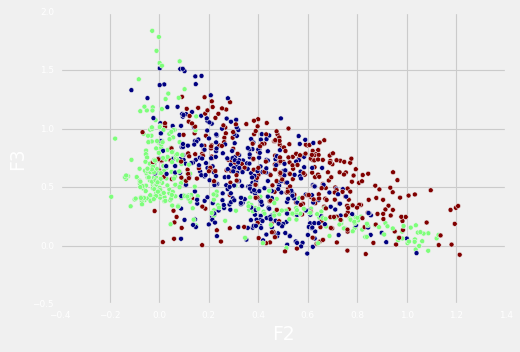

In [70]:
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

plt.scatter(training_set_i['F2'],
            training_set_i['F3'],c = training_set_i['L'])
plt.xlabel("F2")
plt.ylabel("F3")

plt.show()

#Task2

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [27]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

data = training_set_i.iloc[:,:-1]

ss = StandardScaler().fit(data)

data_scaled = ss.transform(data)

pca = PCA()

pca_data = pca.fit_transform(data_scaled)

columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']

In [28]:
te_data = test_data.iloc[:,:-1]

test_scaled = ss.transform(te_data)

pca_test = pca.transform(test_scaled)

### b)

In [29]:
import seaborn as sns

data = pd.DataFrame(pca_data,columns = columns)

data = pd.concat([data, training_set_i[['L']]], axis = 1)

t_data = pd.DataFrame(pca_test,columns = columns)

t_data = pd.concat([t_data, test_data[['L']]], axis = 1)


<function matplotlib.pyplot.show(close=None, block=None)>

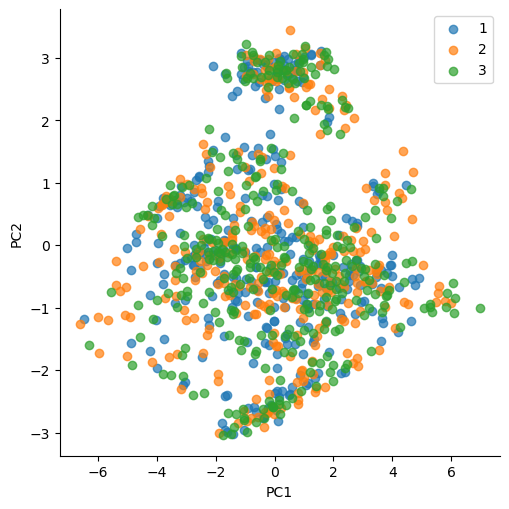

In [72]:
plt.style.use('default')
fg = sns.lmplot(x = 'PC1',y = 'PC2',
           data=data,fit_reg=False,hue='L',legend=False,
           height = 5,
           aspect= 1,
             scatter_kws={'alpha':0.7 })

plt.legend()

plt.show

### c)

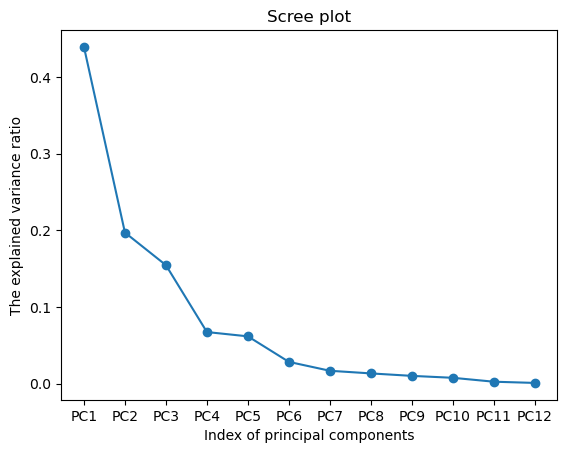

In [74]:
fig = plt.figure()
ax = plt.gca()

plt.plot(pca.explained_variance_ratio_,marker = 'o')
ax.set_xticks(range(0,12))
ax.set_xticklabels(columns)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance ratio")
plt.show()

In [32]:
import numpy as np
cummulative = pd.DataFrame(np.cumsum(pca.explained_variance_),index = columns)
cummulative.columns = ['Explained Variance']
cummulative

,Explained Variance
PC1,5.273139
PC2,7.639774
PC3,9.495959
PC4,10.304931
PC5,11.046627
PC6,11.388395
PC7,11.591100
PC8,11.752524
PC9,11.875415
PC10,11.968061


### d)

In [3]:
from matplotlib.colors import ListedColormap

plt.style.use('seaborn')

fig = plt.figure(2,figsize = (10,7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


classes = ['1', '2', '3']
colours = ListedColormap(['r','b','g'])
colours2 = ListedColormap(['m','y','black'])

scatter = ax1.scatter(data.PC1,data.PC2,c = data.L, cmap = colours)

scatter2 = ax2.scatter(t_data.PC1,t_data.PC2,c = t_data.L, cmap = colours2)

ax1.legend(handles=scatter.legend_elements()[0], labels=classes)

ax2.legend(handles=scatter2.legend_elements()[0], labels=classes)
plt.show()

NameError: name 'plt' is not defined

# Task 3: 


### a)

In [34]:
val_set = training_set_i.iloc[700:1000,:]

print('validation set shape:', val_set.shape)

validation set shape: (300, 13)


### b)

In [35]:
training_set_ii = training_set_i.iloc[:700,:]

print('training set 2 shape:', training_set_ii.shape)

training set 2 shape: (700, 13)


# Task 4: 

In [36]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

x = training_set_ii.iloc[:,:-1]

y = training_set_ii['L']

x_val = val_set.iloc[:,:-1]

y_val = val_set['L']

st_sc = StandardScaler()

param = st_sc.fit(x)

scaled_x = st_sc.transform(x)

scaled_x_val = st_sc.transform(x_val)

### a)

In [37]:
train_r2 = []
val_r2 = []

linear_reg = LinearRegression()

xlabel = y
ylabel = y_val
for i in range(1,13):
    x_data = scaled_x[:,:i]
    x_val_data = scaled_x_val[:,:i]

    y_pred = linear_reg.fit(x_data, xlabel).predict(x_data)
    y_val_pred = linear_reg.predict(x_val_data)
    
    train_r2.append(r2_score(xlabel,np.round(y_pred)))
    val_r2.append(r2_score(ylabel,np.round(y_val_pred)))

#### b)

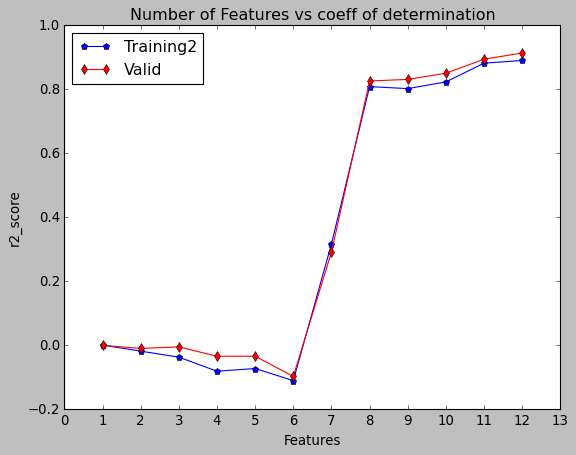

In [38]:
plt.style.use('classic')
plt.title("Number of Features vs coeff of determination")
plt.plot(range(1, 13),np.array(train_r2),marker = 'p', c = 'b', label = 'Training2')
plt.plot(range(1, 13), np.array(val_r2),marker = 'd', c = 'r', label = 'Valid')
plt.xlabel("Features")
plt.ylabel("r2_score")
plt.xticks(range(0, 14))
plt.legend(loc='best')
plt.show()

### c)

  The number of features selected is 8 because after that there is minute increase in accuracy

### d)

In [79]:
regr = LinearRegression()

regr.fit(data_scaled[:,:8],training_set_i['L'])
y_pred_tr_i = regr.predict(data_scaled[:,:8])

y_val_pred_tr_i = regr.predict(test_scaled[:,:8])

print('training score:',r2_score(training_set_i['L'],np.round(y_pred_tr_i)))
print('testing score:',r2_score(test_data['L'],np.round(y_val_pred_tr_i)))

training score: -5.847987415430467e-06
testing score: -0.0005944125222905328


# Task 5: 

### a)

Task1:

Datapoints reported, number of features in each class reported. Both test and training set have almost equal number of datapoints in each class means the data is balanced. Scatter plot of f5 vs f3 shows that they are linearly dependent.

Task 2: 

Scree plot shows first 4 pcs capture 85% of variance, scatter plot of pc1 vs pc2, reported explained variances, generated two subplots for train and test in 1 figure.

Task 3: 

Split training set 1 into validation and training set 2.

Task 4: 

Trained 12 regression models with 12 feature sets to compare their performances on training set 2, Learning curve plotted, 8 features gave best performance. implemented model on training set 1 and test set with 8 features. 

### b)

Using regression algorithm for a classification problem is the main problem. solving the problem using classification techniques like logistic regression or naive bayes might give better results and won't overfit the data.